In [1]:
# Sara Ahmadova 54924

**About Dataset**
- This dataset contains information about various vehicles' carbon dioxide (CO2) emissions and fuel consumption. 
- In the context of Machine Learning (ML), this dataset is often used to predict CO2 emissions based on vehicle characteristics or to analyze fuel efficiency of vehicles. 
- The goal could be to predict CO2 emissions or fuel consumption based on the features of the vehicles.
- There are total 7385 rows and 12 columns. 

**The columns in the dataset can be described as follows:**

1. **Make**: The brand of the vehicle.
2. **Model**: The model of the vehicle.
3. **Vehicle Class**: The class of the vehicle (e.g., compact, SUV).
4. **Engine Size(L)**: The engine size in liters.
5. **Cylinders**: The number of cylinders in the engine.
6. **Transmission**: The type of transmission (e.g., automatic, manual).
7. **Fuel Type**: The type of fuel used (e.g., gasoline, diesel).
8. **Fuel Consumption City (L/100 km)**: Fuel consumption in the city (liters per 100 kilometers).
9. **Fuel Consumption Hwy (L/100 km)**: Highway (out-of-city) fuel consumption.
10. **Fuel Consumption Comb (L/100 km)**: Combined (city and highway) fuel consumption.
11. **Fuel Consumption Comb (mpg)**: Combined fuel consumption in miles per gallon.
12. **CO2 Emissions(g/km)**: CO2 emissions in grams per kilometer.

**Model**

**The "Model" column includes terms that identify specific features or configurations of vehicles:**
- `4WD/4X4`: Four-wheel drive. A drive system where all four wheels receive power.
- `AWD`: All-wheel drive. Similar to 4WD but often with more complex mechanisms for power distribution.
- `FFV`: Flexible-fuel vehicle. Vehicles that can use multiple types of fuel, such as both gasoline and ethanol blends.
- `SWB`: Short wheelbase.
- `LWB`: Long wheelbase.
- `EWB`: Extended wheelbase.

**Transmission**

**The "Transmission" column indicates the type of transmission system in the vehicle:**
- `A`: Automatic. A transmission type that operates without the need for the driver to manually change gears.
- `AM`: Automated manual. A version of a manual transmission that is automated.
- `AS`: Automatic with select shift. An automatic transmission that allows for manual intervention.
- `AV`: Continuously variable. A transmission that uses continuously varying ratios instead of fixed gear ratios.
- `M`: Manual. A transmission type that requires the driver to manually change gears.
- `3 - 10`: Number of gears in the transmission.

**Fuel Type**

**The "Fuel Type" column specifies the type of fuel used by the vehicle:**
- `X`: Regular gasoline.
- `Z`: Premium gasoline.
- `D`: Diesel.
- `E`: Ethanol (E85).
- `N`: Natural gas.

**Vehicle Class**

**The "Vehicle Class" column categorizes vehicles by size and type:**
- `COMPACT`: Smaller-sized vehicles.
- `SUV - SMALL`: Smaller-sized sports utility vehicles.
- `MID-SIZE`: Medium-sized vehicles.
- `TWO-SEATER`: Vehicles with two seats.
- `MINICOMPACT`: Very small-sized vehicles.
- `SUBCOMPACT`: Smaller than compact-sized vehicles.
- `FULL-SIZE`: Larger-sized vehicles.
- `STATION WAGON - SMALL`: Smaller-sized station wagons.
- `SUV - STANDARD`: Standard-sized sports utility vehicles.
- `VAN - CARGO`: Vans designed for cargo.
- `VAN - PASSENGER`: Vans designed for passenger transportation.
- `PICKUP TRUCK - STANDARD`: Standard-sized pickup trucks.
- `MINIVAN`: Smaller-sized vans.
- `SPECIAL PURPOSE VEHICLE`: Vehicles designed for special purposes.
- `STATION WAGON - MID-SIZE`: Mid-sized station wagons.
- `PICKUP TRUCK - SMALL`: Smaller-sized pickup trucks.

This dataset can be used to understand the fuel efficiency and environmental impact of vehicles. Machine learning models can use these features to predict CO2 emissions or perform analyses comparing the fuel consumption of different vehicles.

# <font color='green'> <b>EDA and Data Cleaning</b><font color='black'>

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats
from skimpy import skim
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error

%matplotlib inline  

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading dataset
co2 = pd.read_csv('co2.csv')
df = co2.copy()

In [3]:
# Display the first 5 rows of the DataFrame
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
# Provides a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [5]:
# Randomly sample 10 rows from the DataFrame
df.sample(10)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
876,PORSCHE,911 CARRERA 4S,MINICOMPACT,3.8,6,M7,Z,12.8,8.9,11.0,26,253
2827,JEEP,WRANGLER 4X4,SUV - SMALL,3.6,6,A5,X,14.1,11.1,12.8,22,299
5948,HYUNDAI,Tucson AWD,SUV - SMALL,2.4,4,AS6,X,11.0,9.1,10.1,28,240
6499,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.3,8.5,10.0,28,233
1986,PORSCHE,911 CARRERA 4,MINICOMPACT,3.4,6,M7,Z,12.3,8.7,10.7,26,246
1495,FORD,FUSION,MID-SIZE,2.0,4,AS6,X,10.5,7.0,8.9,32,205
4686,FIAT,500L,STATION WAGON - SMALL,1.4,4,A6,X,10.7,7.9,9.4,30,221
1827,MAZDA,MX-5,TWO-SEATER,2.0,4,M5,Z,10.5,8.5,9.6,29,221
3539,CHEVROLET,SILVERADO 4WD,PICKUP TRUCK - STANDARD,5.3,8,A6,X,15.0,10.7,13.1,22,307
788,MINI,COOPER COUNTRYMAN,COMPACT,1.6,4,A6,Z,9.4,7.9,8.7,32,200


In [6]:
# Display the number of rows and columns.
df.shape

(7385, 12)

In [7]:
# Generates descriptive statistics of numerical columns and transposes the result
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
Cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
Fuel Consumption Hwy (L/100 km),7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
Fuel Consumption Comb (L/100 km),7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
Fuel Consumption Comb (mpg),7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


In [8]:
df.describe(include="object").T

,count,unique,top,freq
Make,7385,42,FORD,628
Model,7385,2053,F-150 FFV,32
Vehicle Class,7385,16,SUV - SMALL,1217
Transmission,7385,27,AS6,1324
Fuel Type,7385,5,X,3637


In [9]:
# Generate a quick summary of the dataset, providing an overview of each column
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 7385   │ │ string      │ 5     │                                                          │
│ │ Number of columns │ 12     │ │ float64     │ 4     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 3     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name              ┃ NA  ┃ NA %   ┃ mean    ┃ sd     ┃ p0   ┃ p25   ┃ p50   ┃ p75   ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ Engine Size(L)           │   0 │      0 │    3.16 │  1.354 │  0.9 │     2 │     3 │   3.7 │   8.4 │ ▇▆▆▃▁  │  │
│ │ Cylinders                │   0 │      0 │   5.615 │  1.828 │    3 │     4 │     6 │     6 │    16 │  ▇▆▃   │  │
│ │ Fuel Consumption City    │   0 │      0 │   12.56 │    3.5 │  4.2 │  10.1 │  12.1 │  14.6 │  30.6 │  ▂▇▅▁  │  │
│ │ (L/100 km)               │     │        │         │        │      │       │       │       │       │        │  │
│ │ Fuel Consumption Hwy     │   0 │      0 │   9.042 │  2.224 │    4 │   7.5 │   8.7 │  10.2 │  20.6 │  ▂▇▃▁  │  │
│ │ (L/100 km)               │     │        │         │        │      │       │       │       │       │        │  │
│ │ Fuel Consumption Comb    │   0 │      0 │   10.98 │  2.893 │  4.1 │   8.9 │  10.6 │  12.6 │  26.1 │  ▁▇▅▁  │  │
│ │ (L/100 km)               │     │        │         │        │      │       │       │       │       │        │  │
│ │ Fuel Consumption Comb    │   0 │      0 │   27.48 │  7.232 │   11 │    22 │    27 │    32 │    69 │  ▂▇▃▁  │  │
│ │ (mpg)                    │     │        │         │        │      │       │       │       │       │        │  │
│ │ CO2 Emissions(g/km)      │   0 │      0 │   250.6 │  58.51 │   96 │   208 │   246 │   288 │   522 │  ▁▇▇▃  │  │
│ └──────────────────────────┴─────┴────────┴─────────┴────────┴──────┴───────┴───────┴───────┴───────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                  ┃ NA     ┃ NA %       ┃ words per row               ┃ total words             ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Make                         │      0 │          0 │                           1 │                    7547 │  │
│ │ Model                        │      0 │          0 │                         2.2 │                   16585 │  │
│ │ Vehicle Class                │      0 │          0 │                           2 │                   14625 │  │
│ │ Transmission                 │      0 │          0 │                           1 │                    7385 │  │
│ │ Fuel Type                    │      0 │          0 │                           1 │                    7385 │  │
│ └──────────────────────────────┴────────┴────────────┴

In [10]:
# Number of missing (null) values for each column.
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

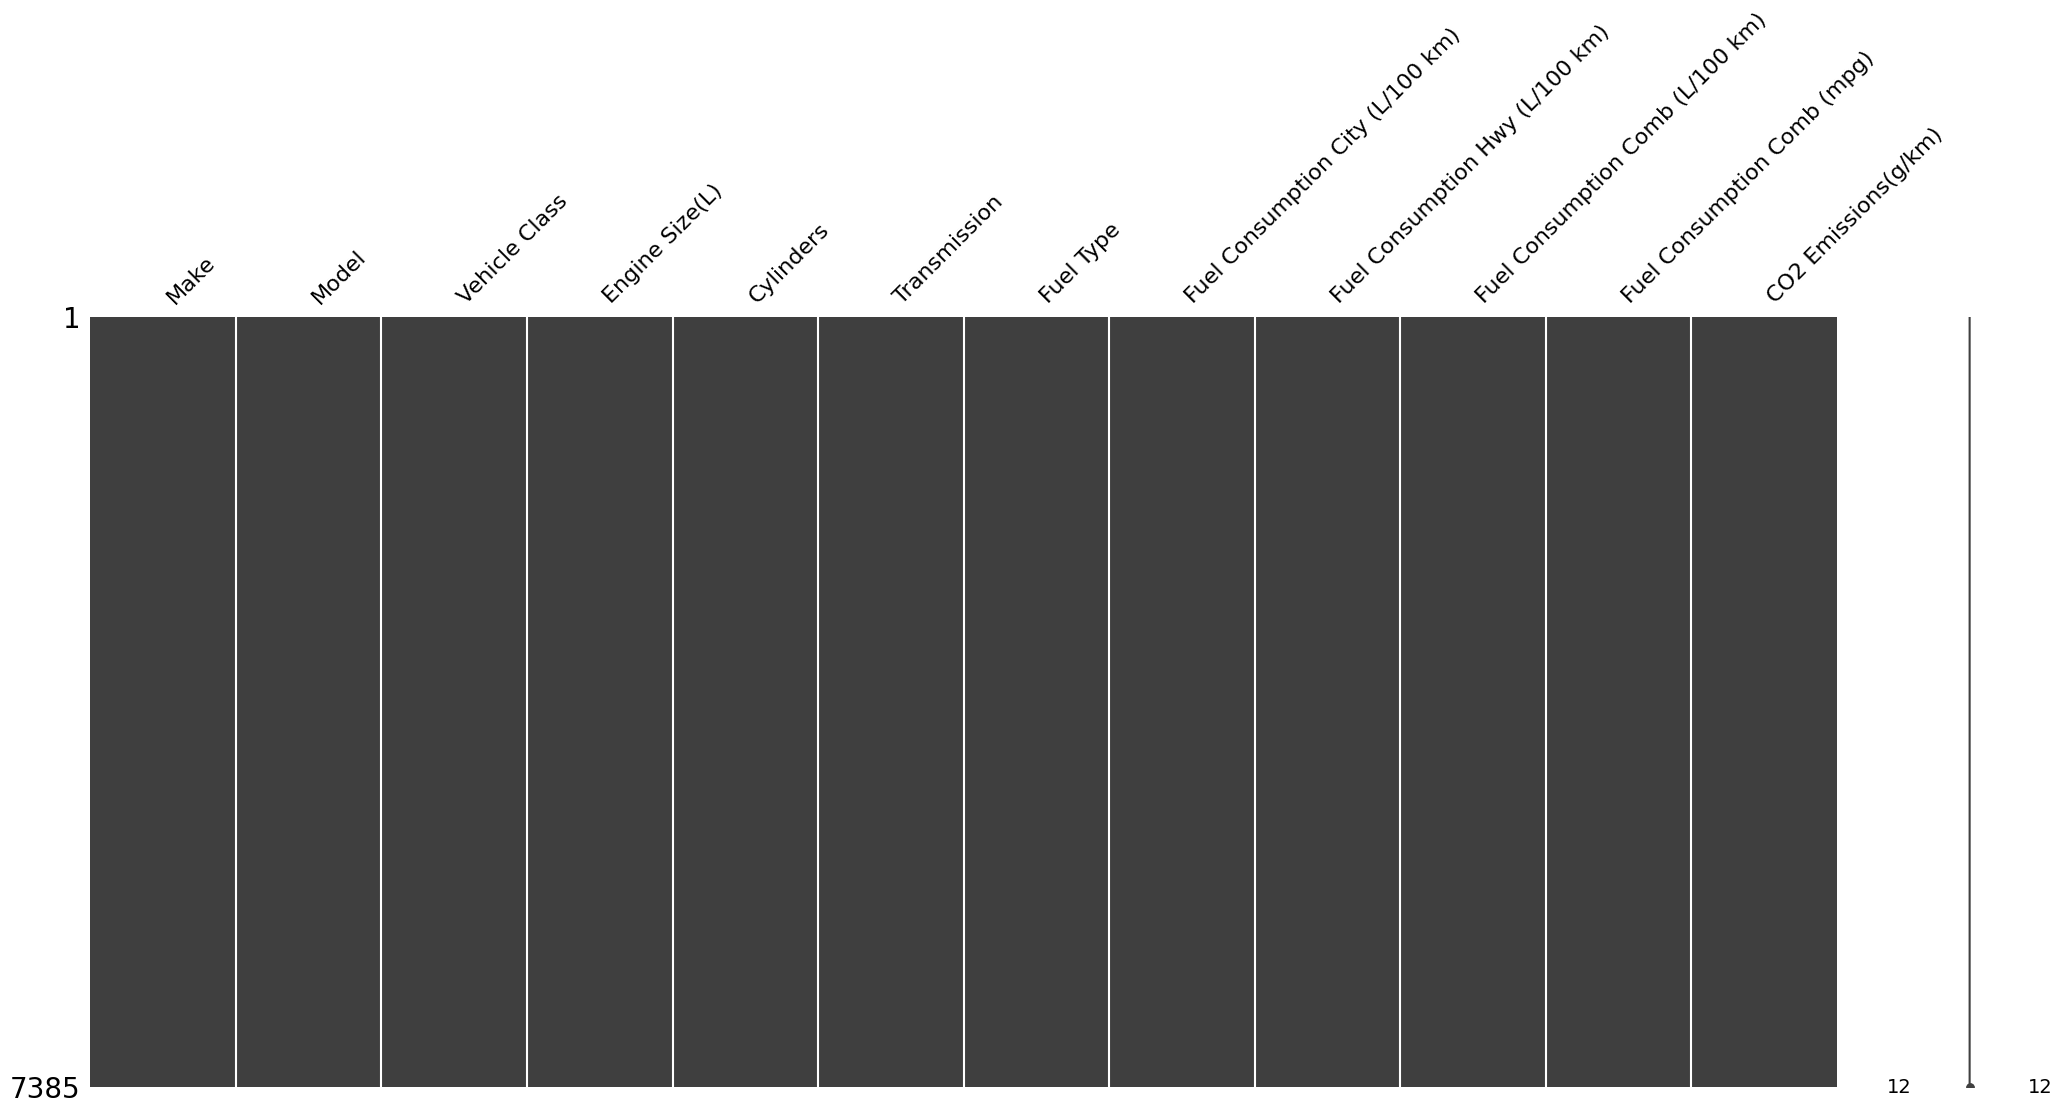

In [11]:
# Visualizes the missing values in the DataFrame using a missing value matrix from the missingno library.
msno.matrix(df);

In [12]:
# Counts the number of duplicate rows in the DataFrame.
df.duplicated().sum()

np.int64(1103)

In [13]:
# Removes duplicate rows from the DataFrame.
df.drop_duplicates(inplace=True)

In [14]:
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [15]:
# Organazing columns
df.rename(columns={ 'Make': 'make',
                    'Model': 'model',
                    'Vehicle Class': 'vehicle_class',
                    'Engine Size(L)': 'engine_size',
                    'Cylinders': 'cylinders',
                    'Transmission': 'transmission',
                    'Fuel Type': 'fuel_type',
                    'Fuel Consumption City (L/100 km)': 'fuel_cons_city',
                    'Fuel Consumption Hwy (L/100 km)': 'fuel_cons_hwy',
                    'Fuel Consumption Comb (L/100 km)': 'fuel_cons_comb',
                    'Fuel Consumption Comb (mpg)': 'fuel_cons_comb_mpg',
                    'CO2 Emissions(g/km)': 'co2'
                    }, inplace=True)

In [16]:
df.columns

Index(['make', 'model', 'vehicle_class', 'engine_size', 'cylinders',
       'transmission', 'fuel_type', 'fuel_cons_city', 'fuel_cons_hwy',
       'fuel_cons_comb', 'fuel_cons_comb_mpg', 'co2'],
      dtype='object')

In [17]:
# Define the mapping
fuel_type_mapping = {
    'Z': 'Premium gasoline',

    'D': 'Diesel',

    'X': 'Regular gasoline',

    'E': 'Ethanol',

    'N': 'Natural Gas'
}

# Apply the mapping to the Fuel Type column
df['fuel_type'] = df['fuel_type'].map(fuel_type_mapping)

In [18]:
df.make.unique()

array(['ACURA', 'ALFA ROMEO', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW',
       'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT',
       'FORD', 'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP',
       'KIA', 'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
       'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'GENESIS', 'BUGATTI'],
      dtype=object)

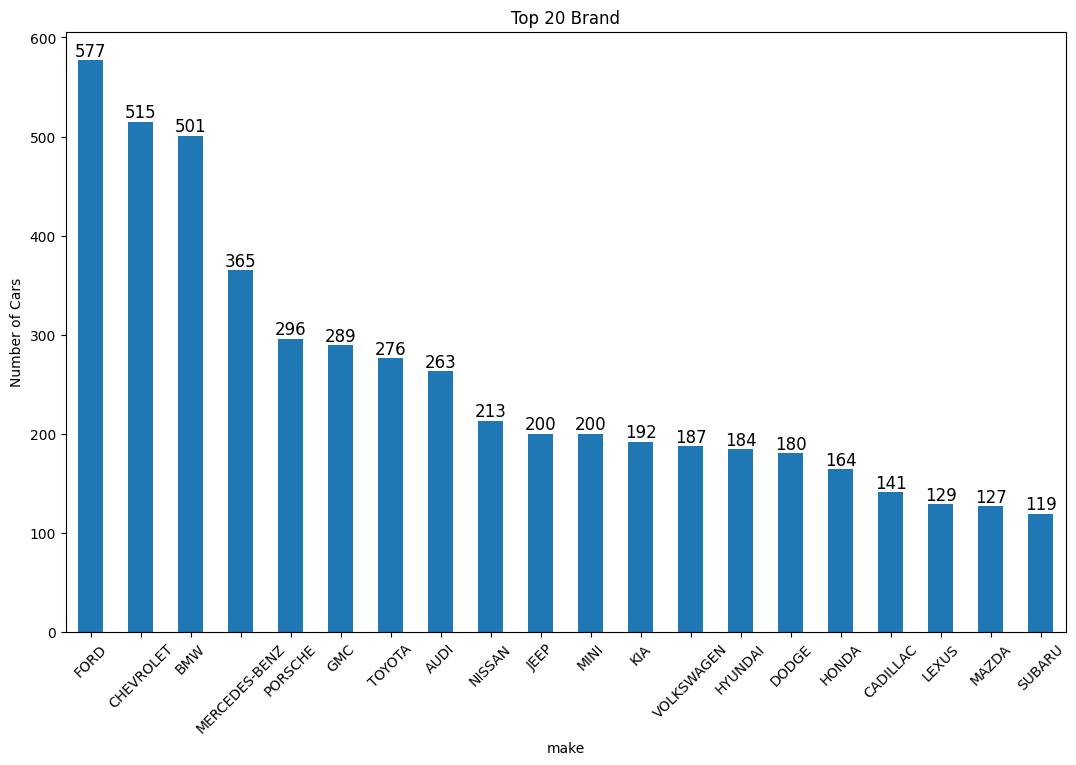

In [19]:
# This code creates a bar chart to display the top 20 car brands based on their frequency in the dataset.
fig = plt.figure(figsize = (10,6))
ax = fig.add_axes([0,0,1,1])
counts = df.make.value_counts().sort_values(ascending=False).head(20) # [0:20]
counts.plot(kind = "bar")
plt.title('Top 20 Brand')   
plt.xlabel('make') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

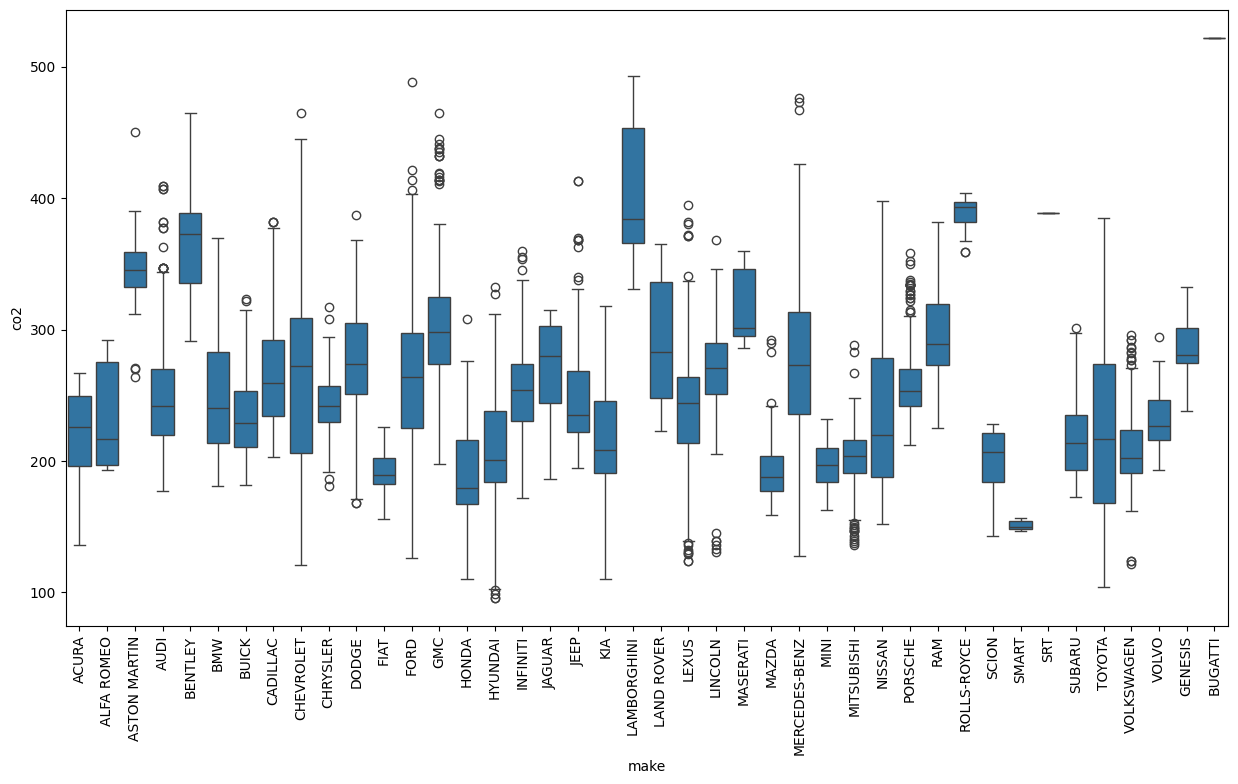

In [20]:
# Boxplot of "co2" values grouped by the "make" variable
plt.figure(figsize = (15,8))
sns.boxplot(x="make", y="co2", data=df)
plt.xticks(rotation = 90);

In [21]:
df.model.unique()

array(['ILX', 'ILX HYBRID', 'MDX 4WD', ...,
       'Tacoma 4WD D-Cab TRD Off-Road/Pro', 'Atlas Cross Sport 4MOTION',
       'XC40 T4 AWD'], dtype=object)

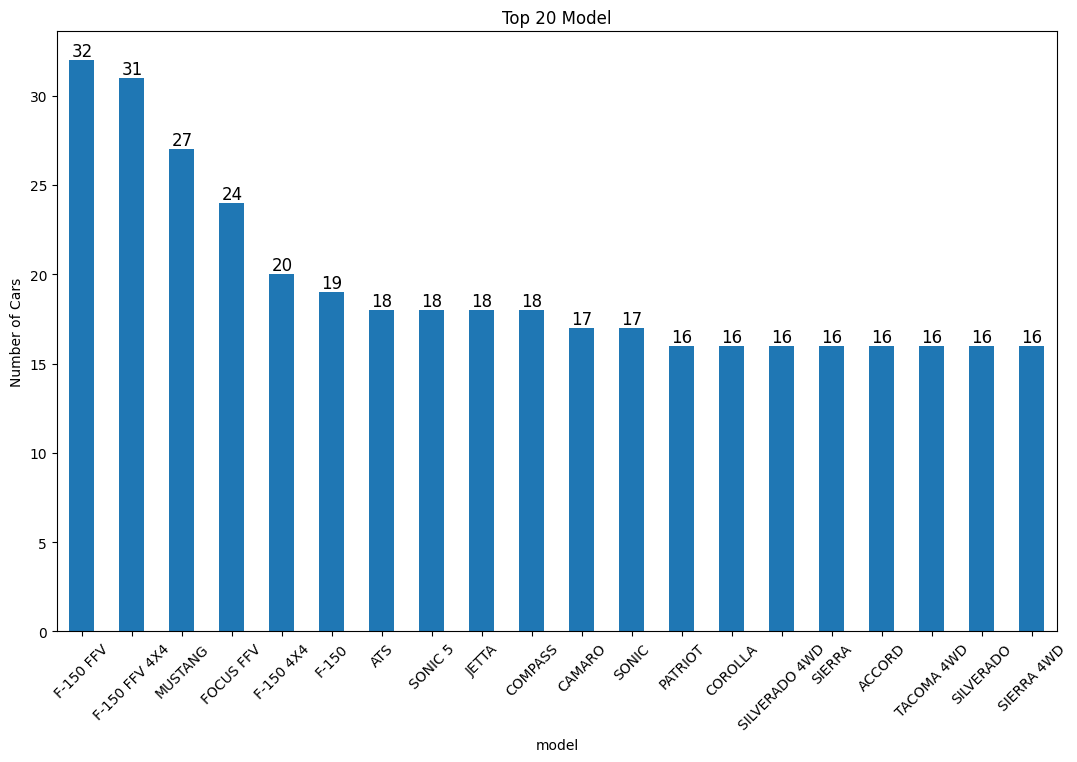

In [22]:
# This code generates a bar chart to display the top 20 car models based on their frequency in the dataset.
fig = plt.figure(figsize = (10,6))
ax = fig.add_axes([0,0,1,1])
counts = df.model.value_counts().sort_values(ascending=False).head(20)
counts.plot(kind = "bar")
plt.title('Top 20 Model')   
plt.xlabel('model') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

In [23]:
df.vehicle_class.unique()

array(['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'TWO-SEATER', 'MINICOMPACT',
       'SUBCOMPACT', 'FULL-SIZE', 'STATION WAGON - SMALL',
       'SUV - STANDARD', 'VAN - CARGO', 'VAN - PASSENGER',
       'PICKUP TRUCK - STANDARD', 'MINIVAN', 'SPECIAL PURPOSE VEHICLE',
       'STATION WAGON - MID-SIZE', 'PICKUP TRUCK - SMALL'], dtype=object)

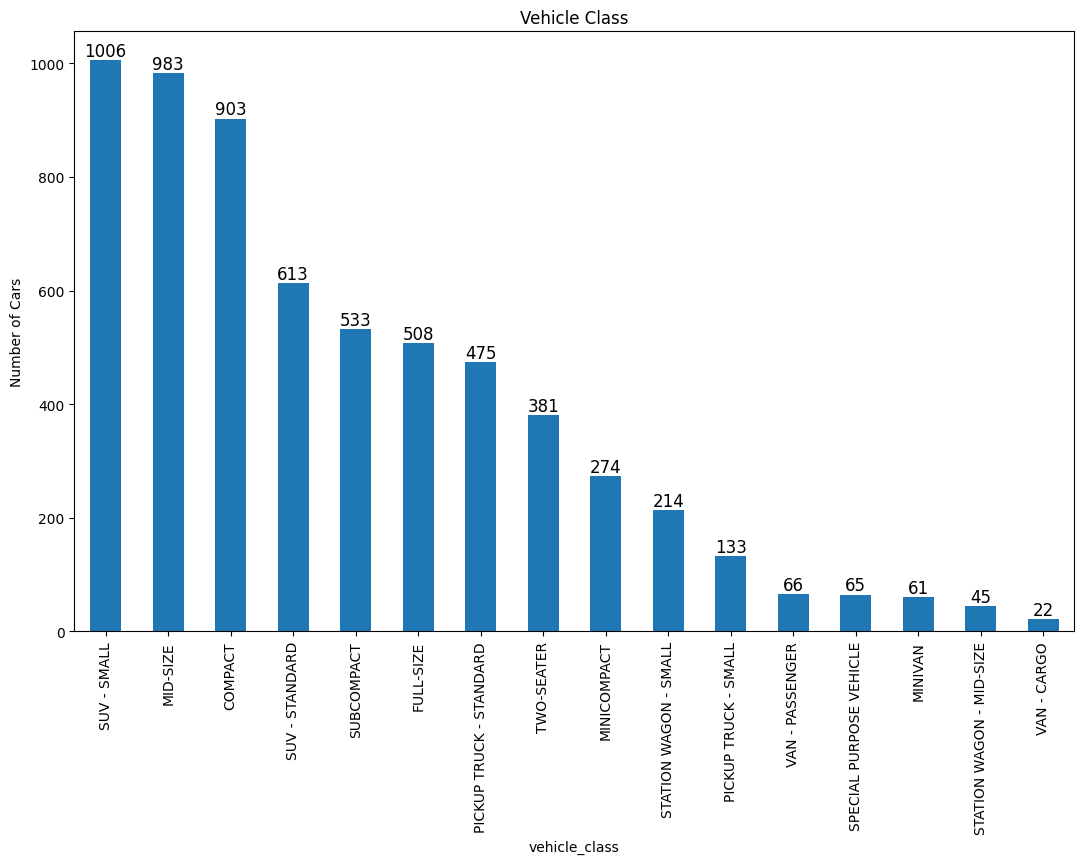

In [24]:
# This code generates a bar chart to display the distribution of car counts across different vehicle classes.
fig = plt.figure(figsize = (10,6))
ax = fig.add_axes([0,0,1,1])
counts = df.vehicle_class.value_counts().sort_values(ascending=False)
counts.plot(kind = "bar")
plt.title('Vehicle Class')   
plt.xlabel('vehicle_class') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 90)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

In [25]:
df.engine_size.unique()

array([2. , 2.4, 1.5, 3.5, 3.7, 1.8, 5.9, 4.7, 3. , 4. , 6.3, 4.2, 5.2,
       6. , 6.8, 4.4, 3.6, 1.4, 2.5, 6.2, 4.3, 5.3, 4.8, 1.2, 5.7, 6.4,
       4.6, 5.4, 1.6, 5. , 1. , 5.8, 3.8, 3.3, 5.6, 3.2, 6.5, 5.5, 2.1,
       3.4, 2.7, 6.6, 6.7, 1.3, 8.4, 2.3, 2.8, 0.9, 2.9, 8. , 2.2])

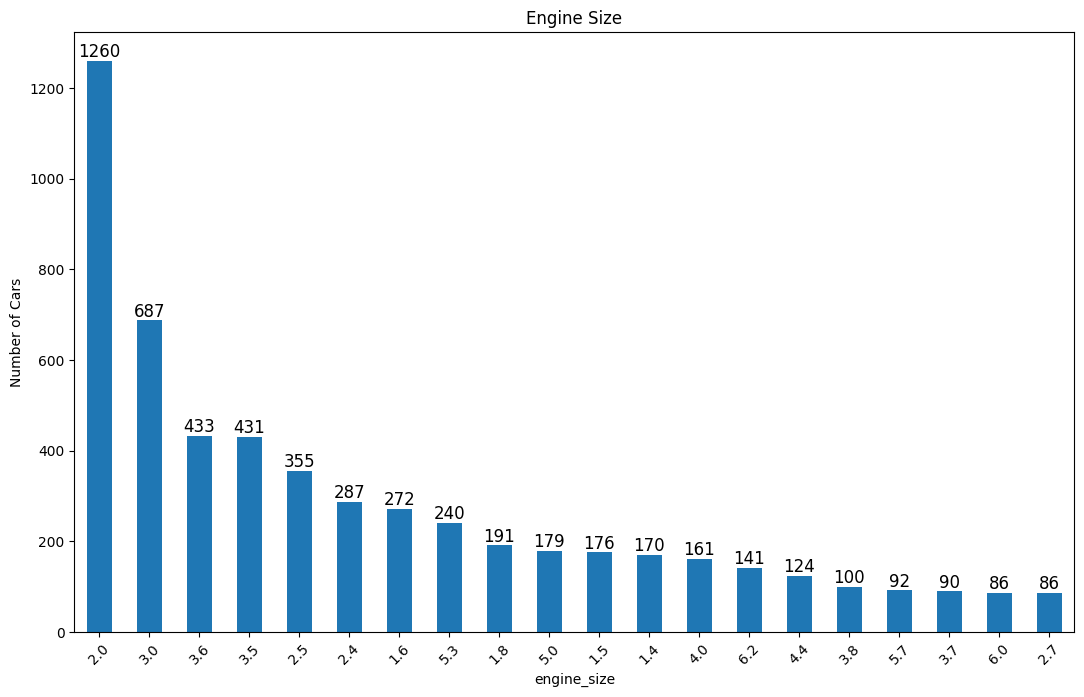

In [26]:
# This code generates a bar chart to display the distribution of car counts across different vehicle classes.
fig = plt.figure(figsize = (10,6))
ax = fig.add_axes([0,0,1,1])
counts = df.engine_size.value_counts().sort_values(ascending=False).head(20)
counts.plot(kind = "bar")
plt.title('Engine Size')   
plt.xlabel('engine_size') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

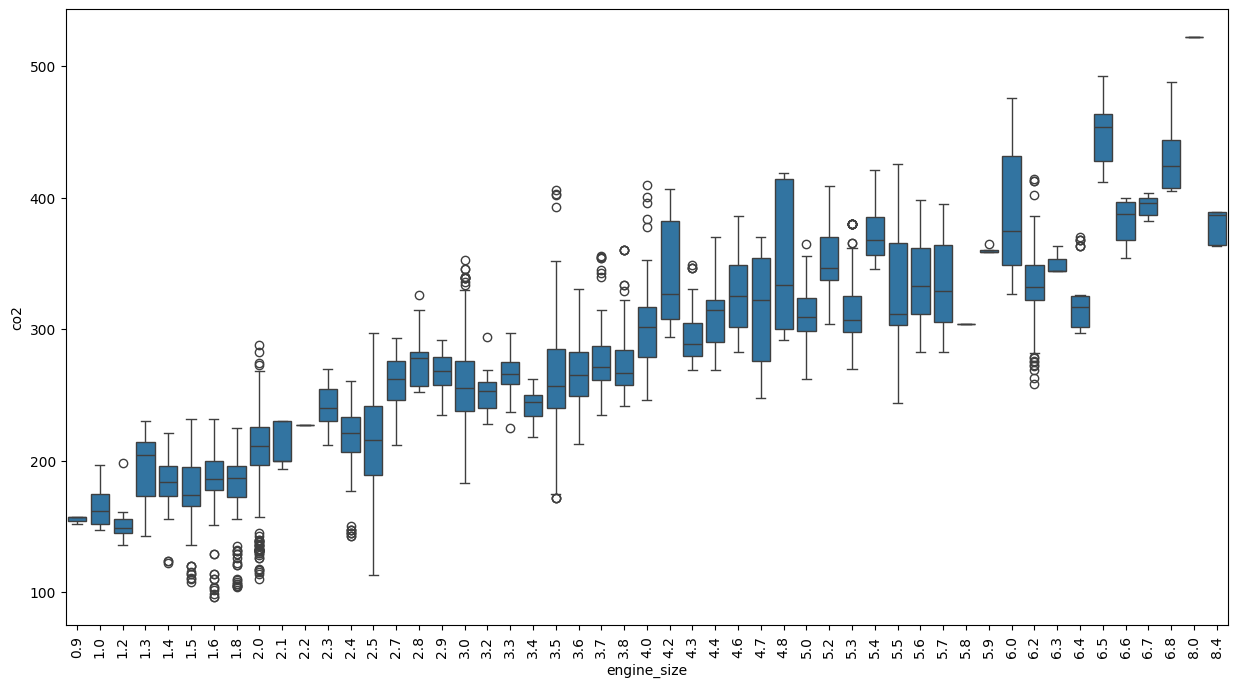

In [27]:
# This code generates a boxplot to visualize the distribution of CO2 emissions (`co2`) for different engine sizes (`engine_size`) in the dataset.
plt.figure(figsize = (15,8))
sns.boxplot(x="engine_size", y="co2", data=df)
plt.xticks(rotation = 90);

In [28]:
df.cylinders.value_counts().sort_values(ascending=False)

cylinders
4     2749
6     2040
8     1202
12     135
3       88
10      40
5       26
16       2
Name: count, dtype: int64

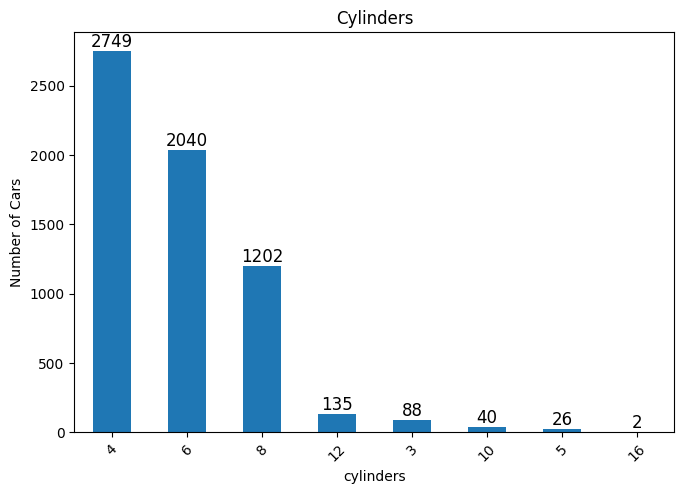

In [29]:
# This code generates a bar chart to display the top 20 most frequent cylinder counts in the dataset.
fig = plt.figure(figsize = (6,4))
ax = fig.add_axes([0,0,1,1])
counts = df.cylinders.value_counts().sort_values(ascending=False).head(20)
counts.plot(kind = "bar")
plt.title('Cylinders')   
plt.xlabel('cylinders') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

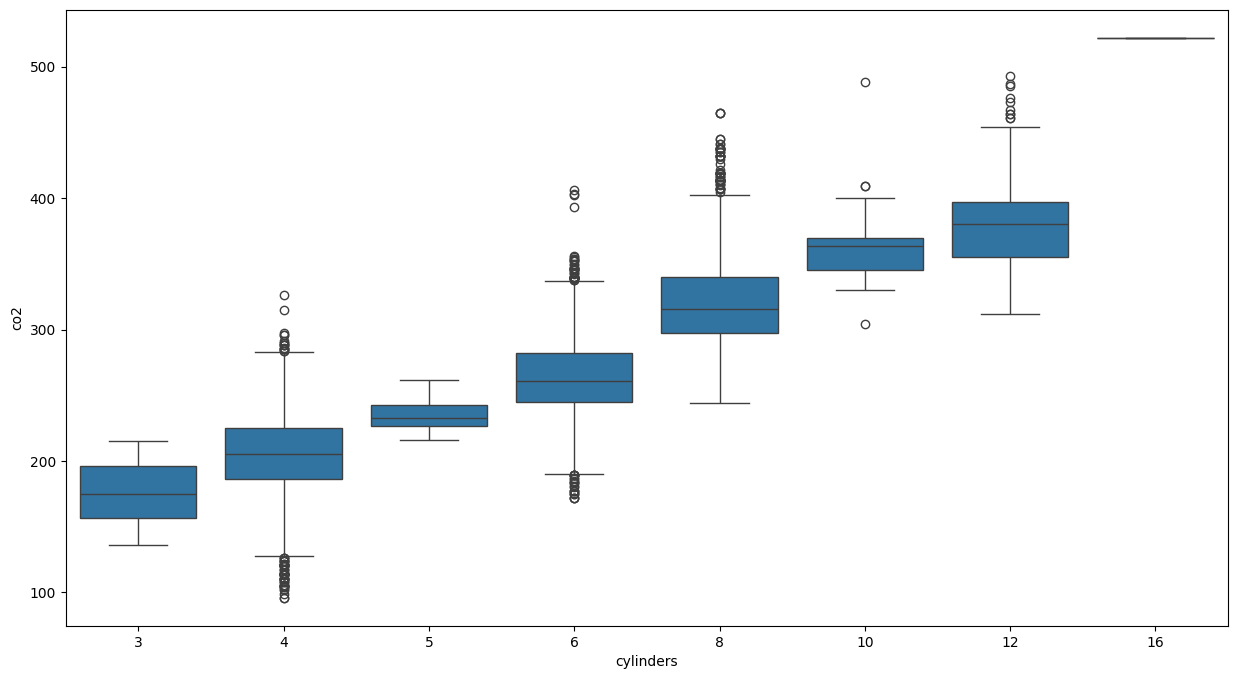

In [30]:
plt.figure(figsize = (15,8))
sns.boxplot(x="cylinders", y="co2", data=df);

# 16 silindrin boxplotu 3 satır olmasında rağmen duplicated olduğu için tek değer gibi gözüküyor

In [31]:
df.transmission.value_counts().sort_values(ascending=False)

transmission
AS6     1139
AS8     1056
M6       773
A6       684
AM7      383
A8       378
AS7      283
A9       263
AV       241
M5       168
AS10     151
AM6      107
AV7       92
AV6       89
A5        78
M7        78
AS9       65
A4        61
AM8       45
A7        44
AV8       34
A10       28
AS5       26
AV10       9
AM5        4
AS4        2
AM9        1
Name: count, dtype: int64

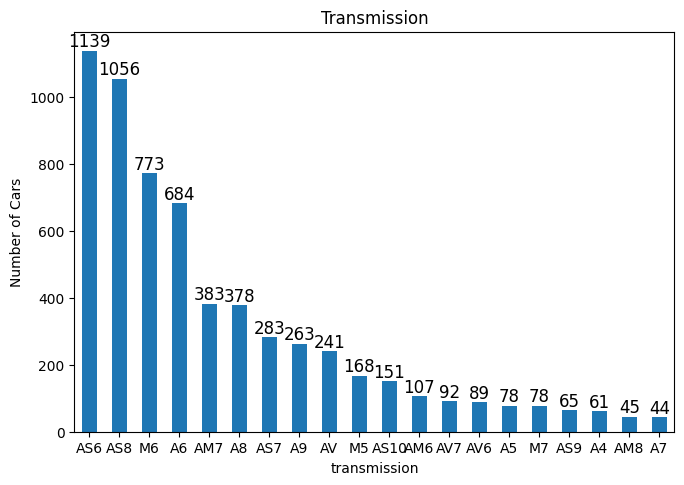

In [32]:
# This code generates a bar chart to display the top 20 most frequent transmission types in the dataset.
fig = plt.figure(figsize = (6,4))
ax = fig.add_axes([0,0,1,1])
counts = df.transmission.value_counts().sort_values(ascending=False).head(20)
counts.plot(kind = "bar")
plt.title('Transmission')   
plt.xlabel('transmission') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 0)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

In [ ]:
df.fuel_type.value_counts()

# Ethanol fuel typically produces lower CO2 emissions compared to standard gasoline fuels.

fuel_type
Regular gasoline    3039
Premium gasoline    2765
Ethanol              330
Diesel               147
Natural Gas            1
Name: count, dtype: int64

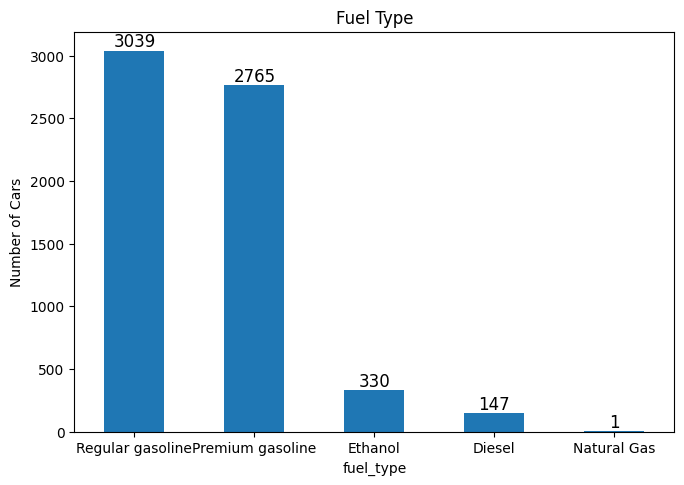

In [34]:
# This code generates a bar chart to display the top 20 most frequent fuel types in the dataset.
fig = plt.figure(figsize = (6,4))
ax = fig.add_axes([0,0,1,1])
counts = df.fuel_type.value_counts().sort_values(ascending=False).head(20)
counts.plot(kind = "bar")
plt.title('Fuel Type')   
plt.xlabel('fuel_type') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 0)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

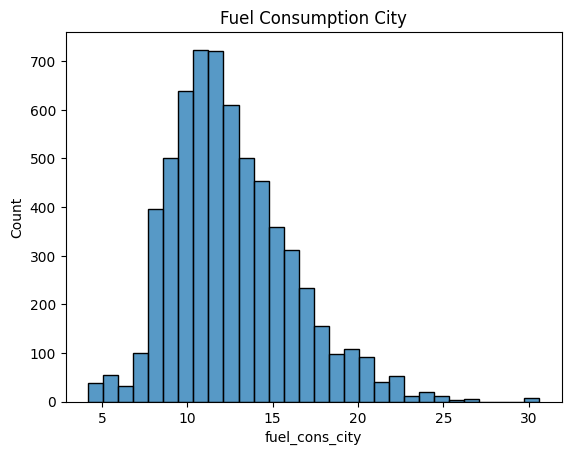

In [35]:
# Create a histogram to visualize the distribution of fuel consumption in the city (`fuel_cons_city`) from the dataset.

sns.histplot(data=df, x="fuel_cons_city", bins=30)
plt.title('Fuel Consumption City');

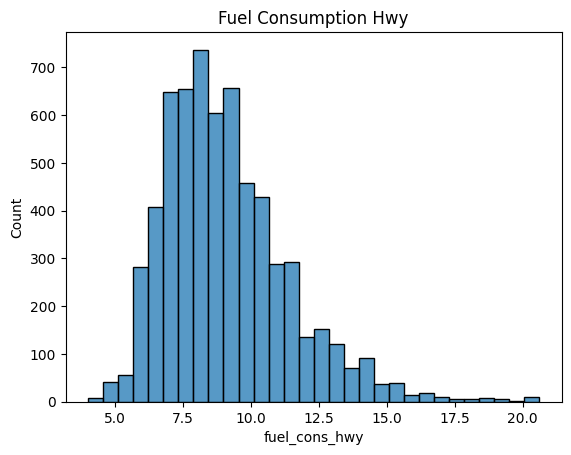

In [36]:
# Create a histogram to visualize the distribution of highway fuel consumption (`fuel_cons_hwy`) from the dataset.
sns.histplot(data=df, x="fuel_cons_hwy", bins=30)
plt.title('Fuel Consumption Hwy');

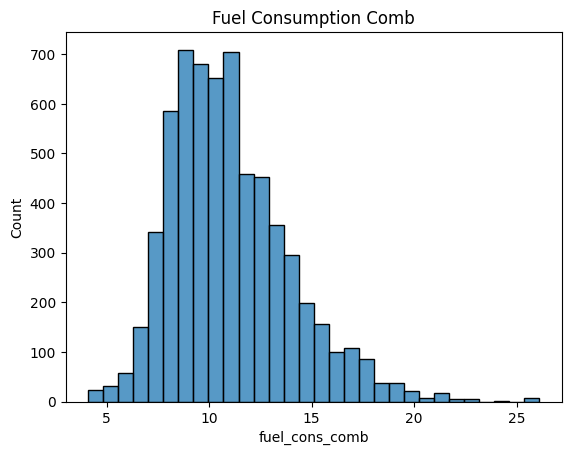

In [37]:
# Create a histogram to visualize the distribution of highway fuel consumption (`fuel_cons_comb`) from the dataset.
sns.histplot(data=df, x="fuel_cons_comb", bins=30)
plt.title('Fuel Consumption Comb');

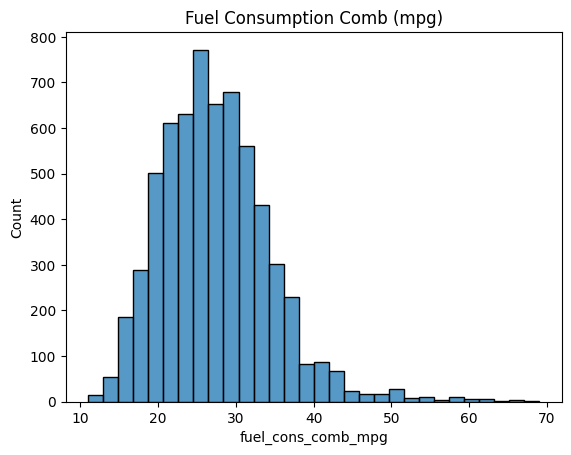

In [38]:
# Create a histogram to visualize the distribution of highway fuel consumption (`fuel_cons_comb_mpg`) from the dataset.
sns.histplot(data=df, x="fuel_cons_comb_mpg", bins=30)
plt.title('Fuel Consumption Comb (mpg)');

<Axes: xlabel='fuel_type', ylabel='co2'>

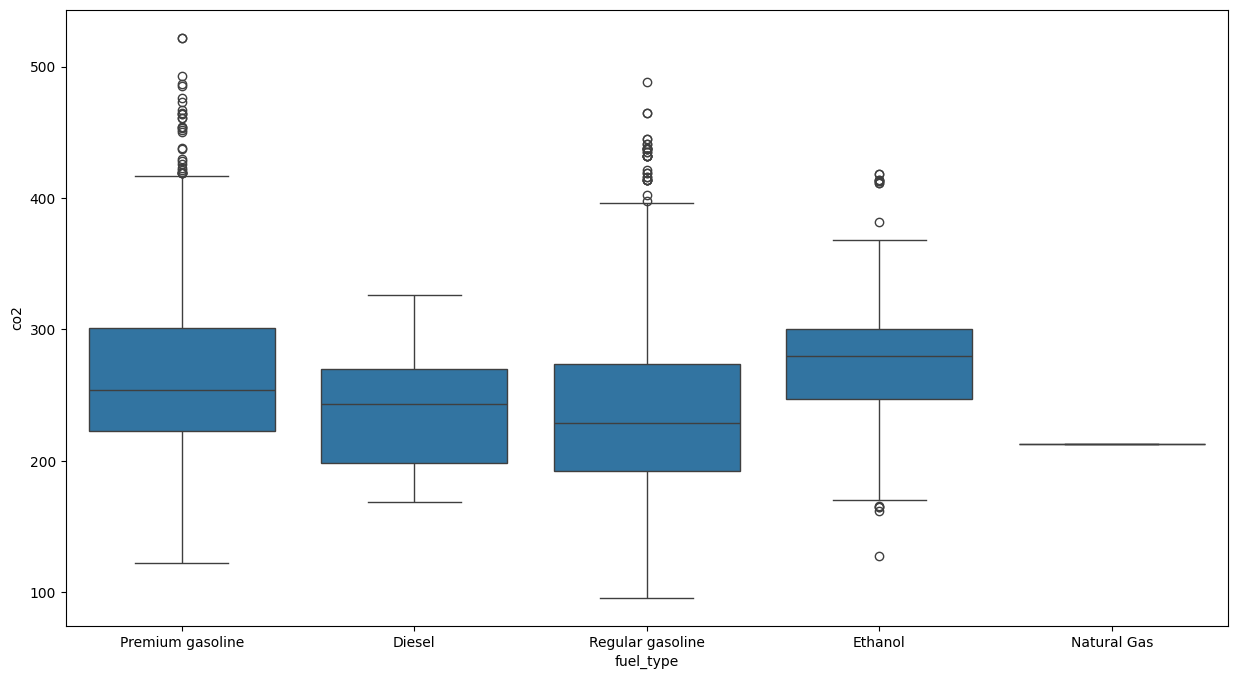

In [39]:
# Create a boxplot to visualize the distribution of CO2 emissions (`co2`) for different fuel types (`fuel_type`) in the dataset.
plt.figure(figsize = (15,8))
sns.boxplot(x="fuel_type", y="co2", data=df)

In [40]:
df[df.co2 == df.co2.min()]

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2
3824,HYUNDAI,IONIQ BLUE,FULL-SIZE,1.6,4,AM6,Regular gasoline,4.2,4.0,4.1,69,96
5931,HYUNDAI,IONIQ Blue,FULL-SIZE,1.6,4,AM6,Regular gasoline,4.2,4.0,4.1,69,96


In [41]:
df[df.co2 == df.co2.max()]

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2
4509,BUGATTI,CHIRON,TWO-SEATER,8.0,16,AM7,Premium gasoline,26.8,16.6,22.2,13,522
5575,BUGATTI,Chiron,TWO-SEATER,8.0,16,AM7,Premium gasoline,26.8,16.6,22.2,13,522


In [42]:
# Define a function and applies it to a correlation matrix to style its values with color coding based on the correlation strength.
def color_correlation1(val):
    """
    Takes a scalar and returns a string with
    the css property in a variety of color scales 
    for different correlations.
    """
    if val >= 0.6 and val < 0.99999 or val <= -0.6 and val > -0.99999:
        color = 'red'
    elif val < 0.6 and val >= 0.3 or val > -0.6 and val <= -0.3:
        color = 'blue'
    elif val == 1:
        color = 'green'    
    else:
        color = 'black'
    return 'color: %s' % color

# Create a DataFrame containing only numerical data
numeric_df = df.select_dtypes(include=[np.number])

# Calculate and style the correlation on the numerical DataFrame
numeric_df.corr().style.applymap(color_correlation1)

,engine_size,cylinders,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2
engine_size,1.000000,0.928843,0.834228,0.766817,0.820146,-0.762955,0.854802
cylinders,0.928843,1.000000,0.801277,0.717647,0.781099,-0.723731,0.834687
fuel_cons_city,0.834228,0.801277,1.000000,0.950811,0.994052,-0.927640,0.918756
fuel_cons_hwy,0.766817,0.717647,0.950811,1.000000,0.978607,-0.891892,0.883424
fuel_cons_comb,0.820146,0.781099,0.994052,0.978607,1.000000,-0.925801,0.916840
fuel_cons_comb_mpg,-0.762955,-0.723731,-0.927640,-0.891892,-0.925801,1.000000,-0.906783
co2,0.854802,0.834687,0.918756,0.883424,0.916840,-0.906783,1.000000


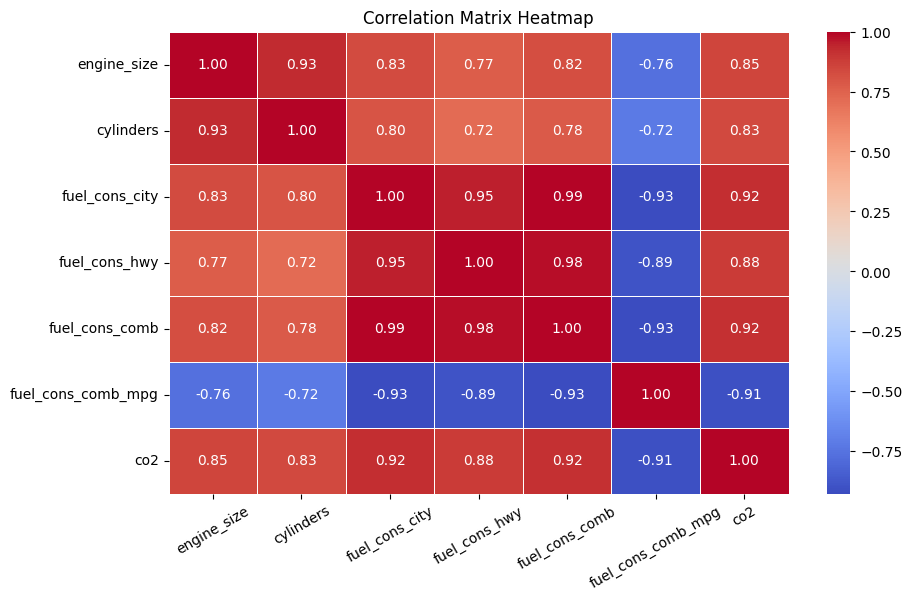

In [43]:
plt.figure(figsize=(10, 6))
# Create a heatmap to visualize the correlation matrix 
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.7, fmt=".2f")

plt.title('Correlation Matrix Heatmap')
# Rotate the x-axis labels by 30 degrees for better readability
plt.xticks(rotation= 30)

plt.show()

The heatmap shows the correlations between numerical columns in this dataset. Here’s how to interpret it:

- CO2 emissions correlate strongly with fuel consumption metrics (City, Hwy, and Comb), as expected.
- Efficient vehicles (higher mpg) produce significantly lower CO2 emissions.
- Larger engines with more cylinders contribute to higher fuel consumption and emissions.
- Fuel efficiency metrics (mpg) are inversely related to CO2 emissions, emphasizing their importance in eco-friendly vehicle design.

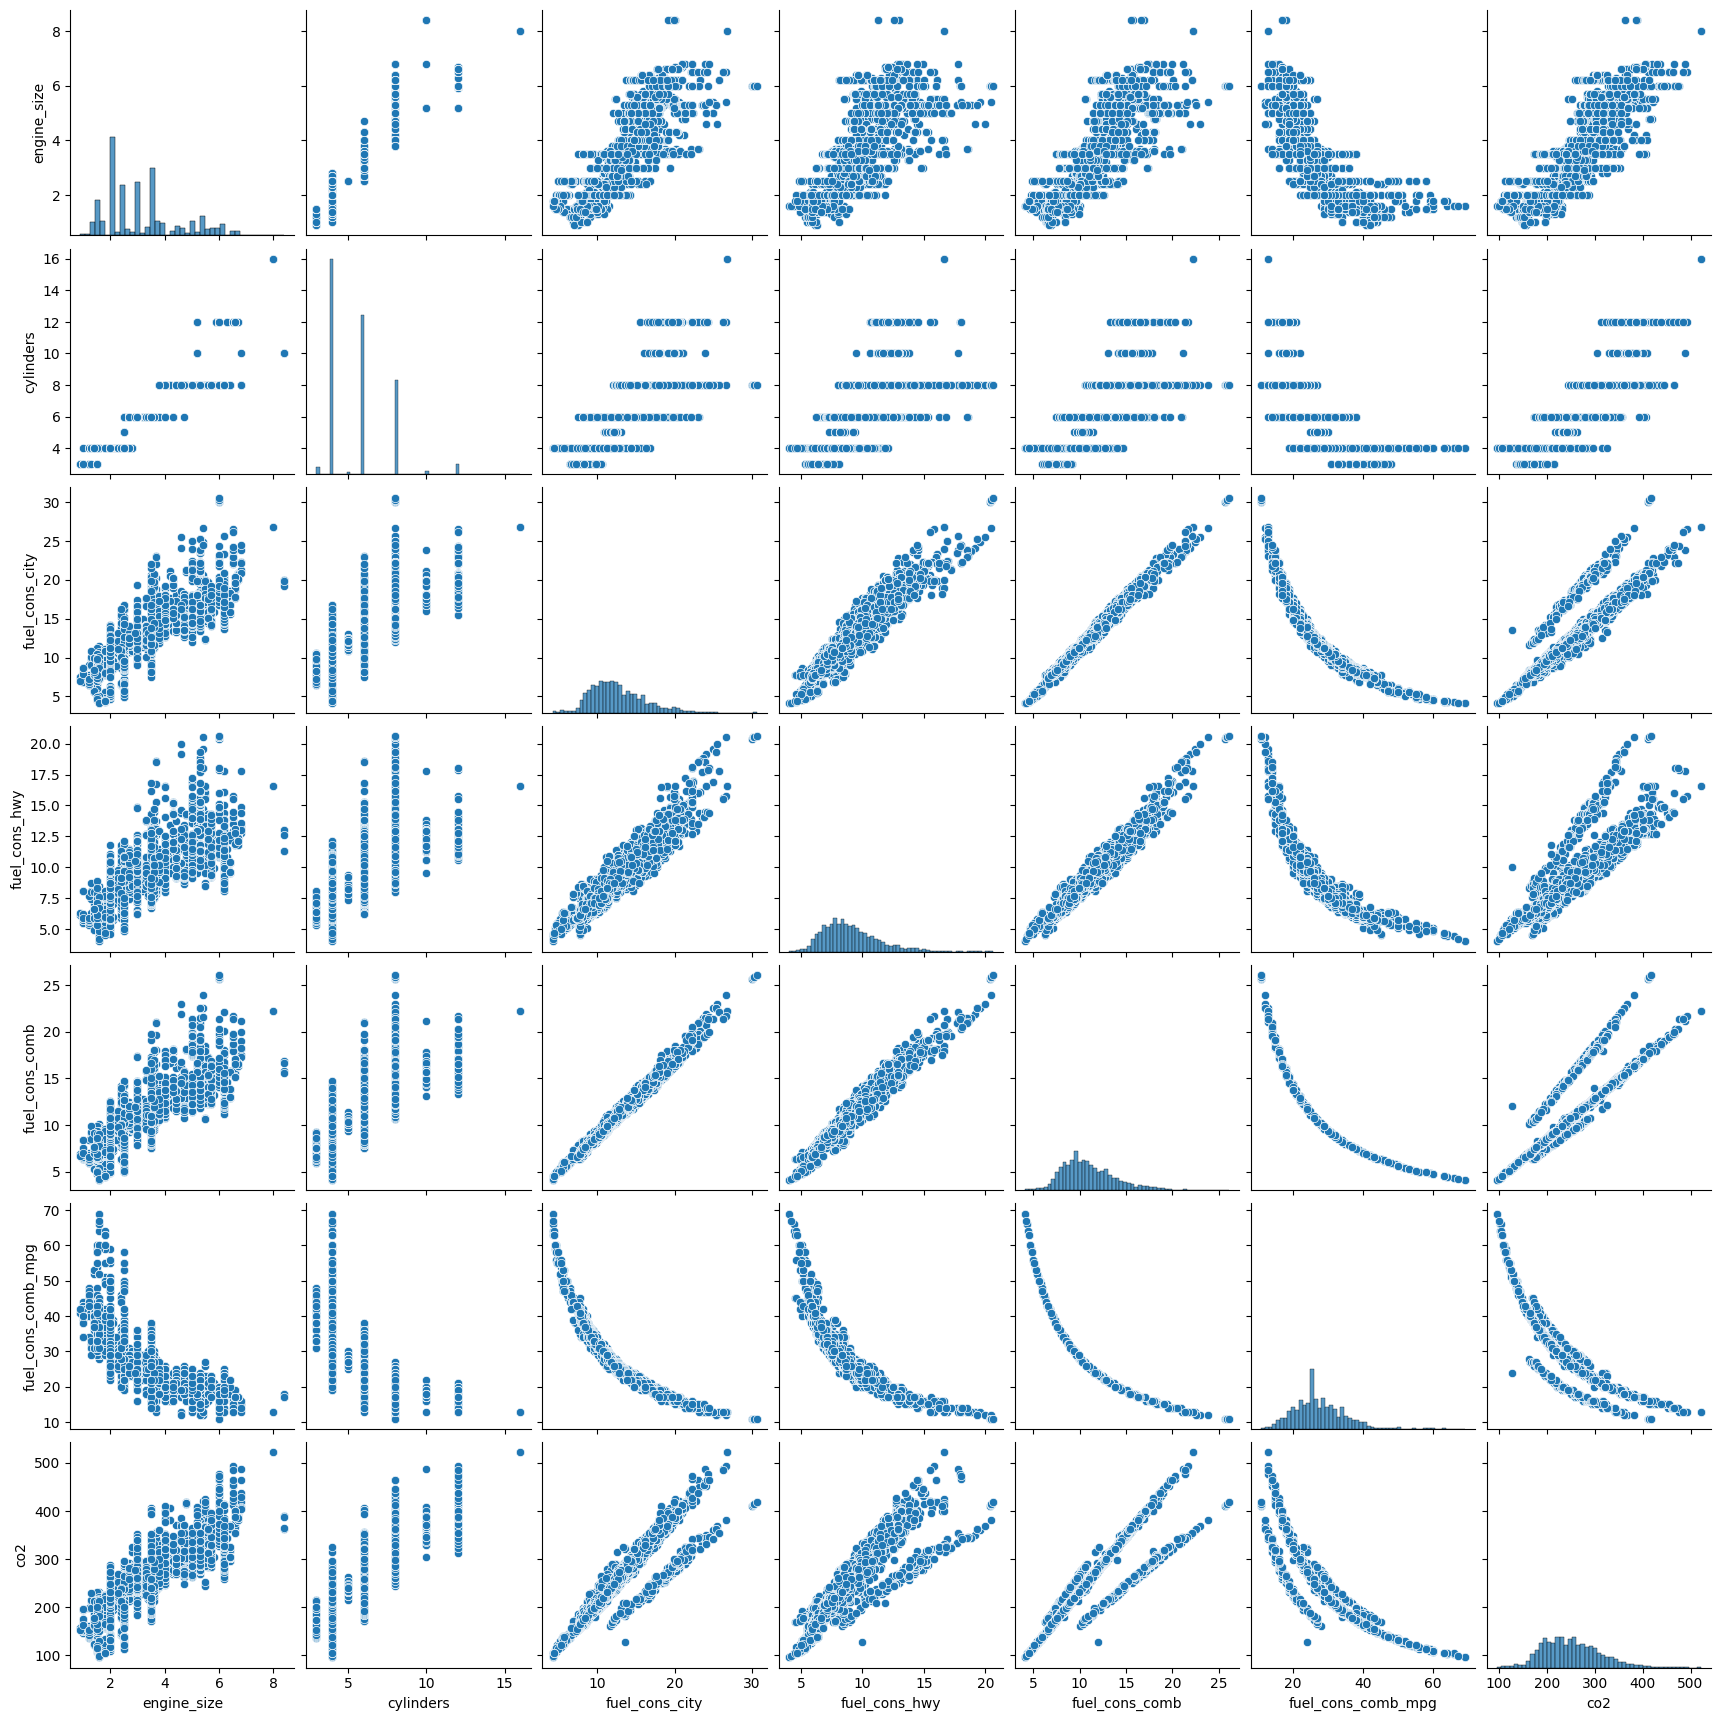

In [44]:
# A pair plot is a type of graph used to visualize the relationships between all pairs of numerical variables in a dataset. Its main purpose is to explore the relationships among multiple variables, 
# especially to determine which variables change together or are correlated with each other.

sns.pairplot(df);

# <font color='green'> <b>Simple Linear Regression Model</b><font color='black'>

**Linear Regression**

Predicts the dependent variable based on the independent variables.

If there is only one independent variable, it is called simple linear regression. 

If there are multiple independent variables, it is called multiple linear regression.

In simple linear regression, if there is a significant relationship between the feature and the target, the data is suitable for linear regression.


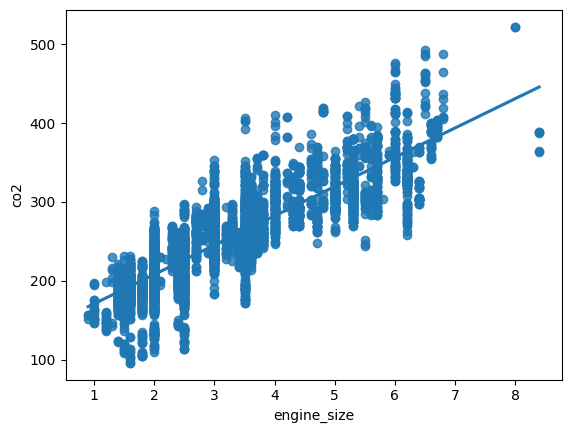

In [45]:
#  Selecting the Line of Best Fit.
sns.regplot(x="engine_size", y ="co2", data = df, ci=None) ;

# This regression line is used to visualize the relationship between two variables.

## <font color='blue'> <b>Splitting the dataset into X (independent variables) and y (dependent variable)</b><font color='black'>

In [47]:
# Define X (features) and y (target)
X = df[['engine_size']] # independent variable
y = df['co2']           # dependent variable

## <font color='blue'> <b>Train | Test Split</b><font color='black'>

In [48]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (5025, 1)
Train target shape   :  (5025,)
Test features shape  :  (1257, 1)
Test target shape    :  (1257,)


## <font color='blue'> <b>Training the Model</b><font color='black'>

In [50]:
# Fitting a linear regression model
slr = LinearRegression()
slr.fit(X_train, y_train)

LinearRegression()

## <font color='blue'> <b>Predicting Test Data</b><font color='black'>

In [51]:
y_train_pred = slr.predict(X_train)

In [53]:
y_pred = slr.predict(X_test)

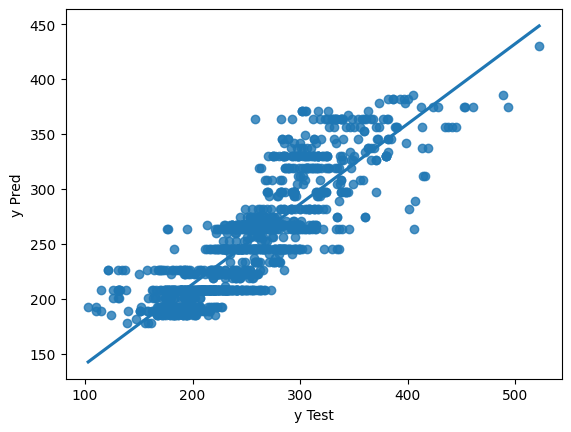

In [54]:
sns.regplot(x=y_test, y=y_pred, ci=None)

plt.xlabel('y Test')
plt.ylabel('y Pred')

plt.show()

## <font color='blue'> <b>Evaluating the Model</b><font color='black'>

In [ ]:
# Define the function to view all regression metrics together.

def train_val(y_train, y_train_pred, y_test, y_pred, model_name):
    
    scores = {model_name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    model_name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [ ]:
slr_score = train_val(y_train, y_train_pred, y_test, y_pred, "s_linear")
slr_score 

# To compare the metric scores obtained from each algorithm, we assign these scores to a variable, and later concatenate these scores for interpretation.
# First, we calculate our metrics using the test set.
# Then, we also calculate our metrics using the train set to compare the scores obtained on unseen data (test set) with the scores obtained on the training data.
# If the scores are similar, it indicates that the model is generalizing well.
# However, if there are significant differences between the scores, it means the model is not generalizing well.

,s_linear_train,s_linear_test
R2,0.730376,0.731670
mae,23.163052,23.645582
mse,941.173085,968.328026
rmse,30.678544,31.117970


In [57]:
avg_em= df['co2'].mean()
avg_em

np.float64(251.1577523081821)

In [58]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

np.float64(31.117969504084073)

In [ ]:
# determine how much the error is relative to the mean of the target label
rmse/avg_em

# According to the RMSE metric, our model has an average error of 12%.
# We prefer the RMSE metric because it penalizes poor predictions.

np.float64(0.12389810474932463)

## <font color='blue'> <b>Residuals</b><font color='black'>

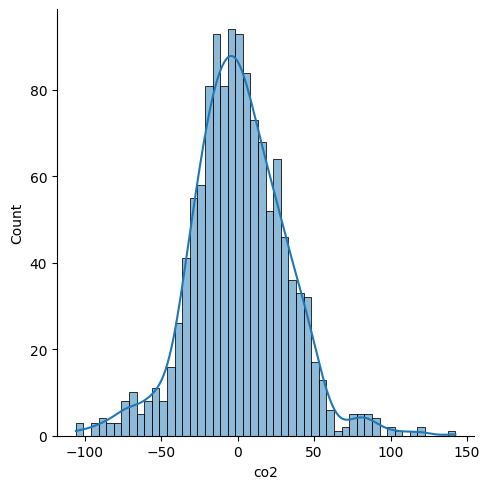

In [60]:
# Create a graph using distplot to show the distribution of residuals, which represent the differences between actual and predicted values.

sns.displot((y_test-y_pred), bins=50, kde=True);

# For my model to fit a linear model, the residuals should conform to a normal distribution and should not exhibit any patterns.

## <font color='blue'> <b>Prediction Error for LinearRegression</b><font color='black'>

In [61]:
# Examine the distribution of residuals for both the train and test sets.

from yellowbrick.regressor import PredictionError

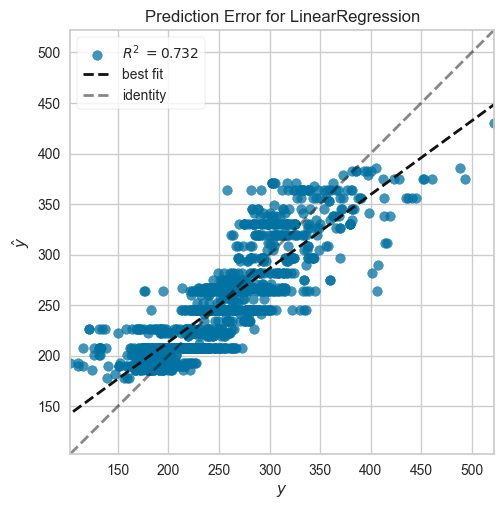

In [62]:
# Will examine how the errors are distributed and reset our model.

model = LinearRegression() 
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)    
visualizer.score(X_test, y_test)  
visualizer.show(); 

# Train the model using the train data.
# Calculate the scores using the test data.
# Plot the graphs to visualize the results.

### Model Prediction vs Actual Values

- **Y-axis**: Represents the predicted values.
- **X-axis**: Represents the actual values.
- **Faint Line (Grey)**: Indicates the points where the model's predictions are perfect.
- **Dark Line**: Represents the best fit line drawn by the model after training.

1. **Proximity of Lines**:
   - The closer the dark line is to the faint line, the better the model's predictions.
   - A significant gap indicates poor performance.
2. **Identity Line**:
   - The identity line shows where the average difference between actual values (`y`) and predicted values (`y_pred`) equals zero.
   - This implies residuals are 0 and the R² score equals 1.
3. **Performance Issue**:
   - If the best fit line drawn by the model is far from the identity line, it suggests that the model's predictions are not reliable and the performance is low.


# <font color='green'> <b>Multiple Linear Regression Model</b><font color='black'>

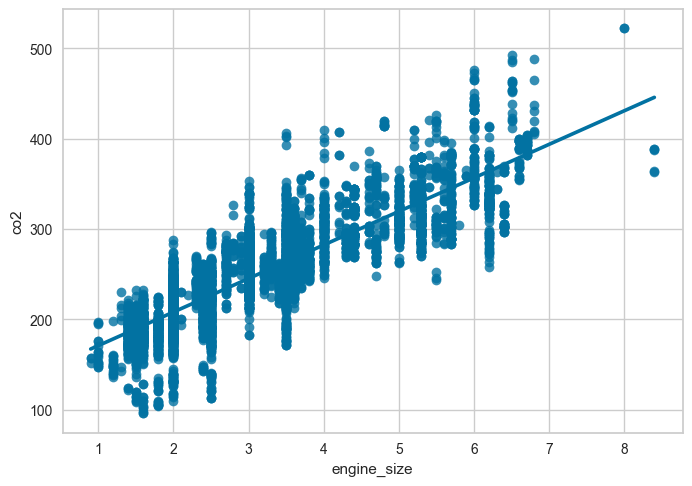

In [63]:
sns.regplot(x="engine_size", y ="co2", data = df, ci=None) ;

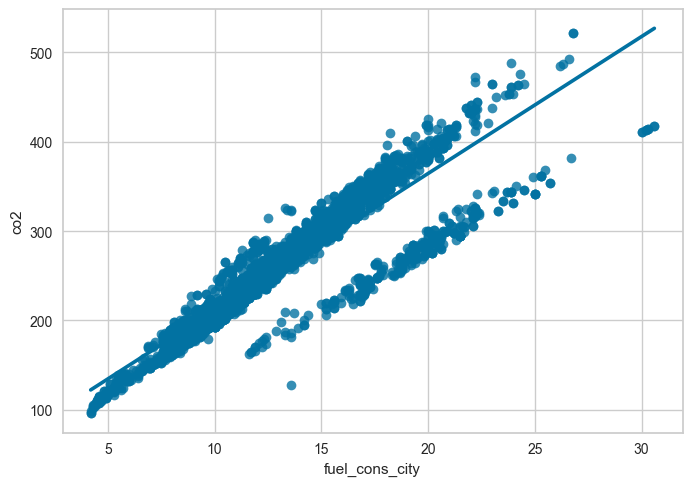

In [77]:
sns.regplot(x="fuel_cons_city", y ="co2", data = df, ci=None) ;

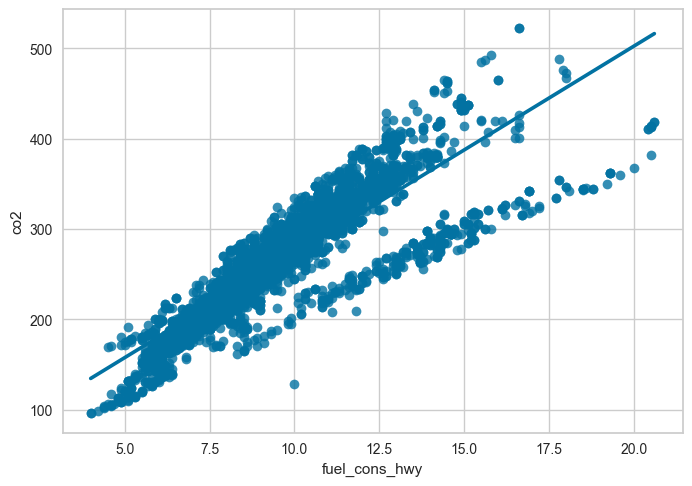

In [78]:
sns.regplot(x="fuel_cons_hwy", y ="co2", data = df, ci=None) ;

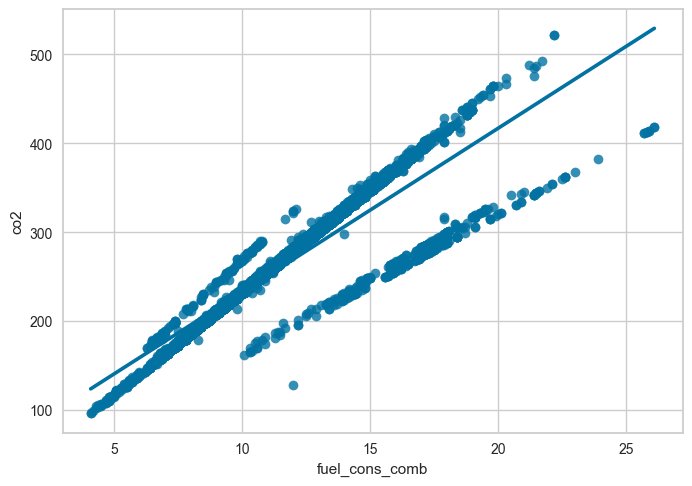

In [79]:
sns.regplot(x="fuel_cons_comb", y ="co2", data = df, ci=None) ;

## <font color='blue'> <b>Splitting the dataset into X(independent variables) and y (dependent variable)</b><font color='black'>

In [64]:
# Define X (features) and y (target)
X = df[['engine_size', 'fuel_cons_city', 'fuel_cons_hwy', 'fuel_cons_comb']]
y = df['co2']

In [65]:
def color_correlation2(val):
    """
    Takes a scalar and returns a string with
    the css property in a variety of color scales 
    for different correlations.
    """
    if val >= 0.9 and val < 0.99999 or val <= -0.6 and val > -0.99999:
        color = 'red'
    elif val < 0.9 and val >= 0.3 or val > -0.6 and val <= -0.3:
        color = 'blue'
    elif val == 1:
        color = 'green'    
    else:
        color = 'black'
    return 'color: %s' % color
 
numeric_df.corr().style.applymap(color_correlation2)
# Use this to highlight correlation values greater than -0.90 or +0.90 among features in a specific color.

,engine_size,cylinders,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2
engine_size,1.000000,0.928843,0.834228,0.766817,0.820146,-0.762955,0.854802
cylinders,0.928843,1.000000,0.801277,0.717647,0.781099,-0.723731,0.834687
fuel_cons_city,0.834228,0.801277,1.000000,0.950811,0.994052,-0.927640,0.918756
fuel_cons_hwy,0.766817,0.717647,0.950811,1.000000,0.978607,-0.891892,0.883424
fuel_cons_comb,0.820146,0.781099,0.994052,0.978607,1.000000,-0.925801,0.916840
fuel_cons_comb_mpg,-0.762955,-0.723731,-0.927640,-0.891892,-0.925801,1.000000,-0.906783
co2,0.854802,0.834687,0.918756,0.883424,0.916840,-0.906783,1.000000


## <font color='blue'> <b>Train | Test Split</b><font color='black'>

In [66]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [67]:
# Check the shapes of the train and test sets
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (5025, 4)
Train target shape   :  (5025,)
Test features shape  :  (1257, 4)
Test target shape    :  (1257,)


## <font color='blue'> <b>Training the Model</b><font color='black'>

In [68]:
# Fit a linear regression model
mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression()

## <font color='blue'> <b>Predicting Test Data</b><font color='black'>

In [69]:
y_train_pred = mlr.predict(X_train)

In [70]:
y_pred = mlr.predict(X_test)

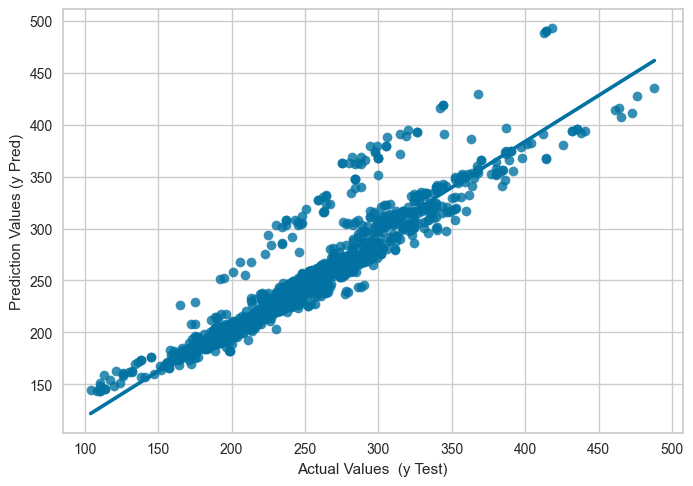

In [ ]:
# Creates a scatter plot with a regression line to compare actual values and predicted values
data = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

sns.regplot(data=data, x='y_test', y='y_pred', ci=None)
plt.xlabel('Actual Values  (y Test)')
plt.ylabel('Prediction Values (y Pred)')
plt.show()

## <font color='blue'> <b>Evaluating the Model</b><font color='black'>

In [71]:
mlr.coef_ 
# This gives the coefficients of the model
# Will use the coefficients to observe the impact of features on predictions and for feature selection.

array([13.14410362,  4.34564972,  2.04296731,  6.79307686])

In [72]:
# Gives the intercept (constant term) of the model.
mlr.intercept_ 

np.float64(61.6153178237351)

In [81]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

np.float64(21.737790072309213)

In [ ]:
rmse/avg_em   #In SLR, the model was making an **average error of 12%**.

np.float64(0.0865503448431723)

In [87]:
# For overfitting check, let's find the R2 score on the train data and compare it with the test R2 (0.86).
# Make predictions on the X_train and X_test values
y_pred = mlr.predict(X_test)
y_train_pred = mlr.predict(X_train)

In [88]:
train_val(y_train, y_train_pred, y_test, y_pred, "linear")

,linear_train,linear_test
R2,0.874667,0.866667
mae,13.606019,13.947496
mse,439.597828,472.531517
rmse,20.966588,21.737790


In [89]:
comparing_data= pd.DataFrame({"actual": y_test , "pred":y_pred, "residual":y_test - y_pred})
comparing_data

,actual,pred,residual
3295,259,252.010242,6.989758
4575,176,180.543588,-4.543588
3585,257,256.198435,0.801565
7199,174,181.423433,-7.423433
2915,186,212.178130,-26.178130
...,...,...,...
2151,271,268.496525,2.503475
4,244,249.982472,-5.982472
2233,232,234.848068,-2.848068
2546,168,176.128543,-8.128543


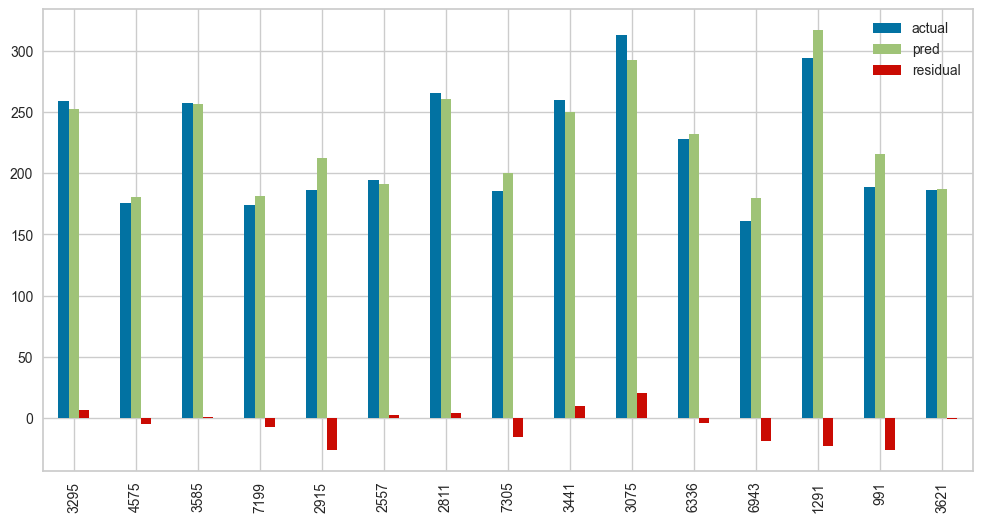

In [90]:
comparing_data.head(15).plot(kind= "bar", figsize = (12,6))
plt.show()

## <font color='blue'> <b>Cross Validate</b><font color='black'>

In [91]:
from sklearn.model_selection import cross_validate, cross_val_score

# cross_val_score returns a score for a single metric, while cross_validate can return scores for multiple metrics, making it more flexible and versatile.

In [92]:
# The model should be reset before each cross-validation iteration. 
# Otherwise, information from previous iterations may leak into the new iteration (data leakage), leading to misleading results.

model = LinearRegression()
scores = cross_validate(model, X_train, y_train, 
                        scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                    'neg_root_mean_squared_error'], cv = 10, return_train_score=True)

In [93]:
pd.DataFrame(scores, index = range(1,11))

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
1,0.028667,0.004271,0.861702,0.876084,-13.851471,-13.529474,-486.658143,-434.408084,-22.060330,-20.842459
2,0.011069,0.008436,0.867390,0.875398,-14.110708,-13.414366,-484.899974,-434.737429,-22.020444,-20.850358
3,0.010220,0.003987,0.864904,0.875629,-13.412441,-13.613814,-446.342805,-438.885235,-21.126827,-20.949588
4,0.002795,0.009907,0.874299,0.874635,-14.273059,-13.635686,-447.922194,-438.785974,-21.164172,-20.947219
5,0.009649,0.003891,0.884255,0.873624,-12.676961,-13.684707,-396.304554,-444.419383,-19.907399,-21.081257
6,0.000000,0.000000,0.852259,0.876927,-14.077951,-13.490164,-482.085344,-434.975698,-21.956442,-20.856071
7,0.000000,0.000000,0.908548,0.870295,-12.790274,-13.877498,-360.868221,-448.615579,-18.996532,-21.180547
8,0.014288,0.002086,0.893123,0.872643,-13.039155,-13.785890,-364.759229,-448.028929,-19.098671,-21.166694
9,0.000000,0.013579,0.863642,0.875869,-14.112567,-13.425416,-501.949403,-432.797163,-22.404227,-20.803778
10,0.000000,0.015093,0.863708,0.875753,-13.903957,-13.581317,-443.100161,-439.323191,-21.049944,-20.960038


In [94]:
scores = pd.DataFrame(scores, index=range(1,11))
scores.iloc[:, 2:].mean()

# Calculate the *average of the metrics* obtained from the new train and validation sets derived from the train set.

test_r2                                0.873383
train_r2                               0.874686
test_neg_mean_absolute_error         -13.624854
train_neg_mean_absolute_error        -13.603833
test_neg_mean_squared_error         -441.489003
train_neg_mean_squared_error        -439.497667
test_neg_root_mean_squared_error     -20.978499
train_neg_root_mean_squared_error    -20.963801
dtype: float64

In [95]:
mlr_score = train_val(y_train, y_train_pred, y_test, y_pred, "mlr")
mlr_score
# The train and test set scores obtained from the train_val function provide insights into whether overfitting exists in the data.
# Determining whether overfitting truly exists is done by comparing the *train and validation scores* obtained from cross-validation (CV), as demonstrated above.

,mlr_train,mlr_test
R2,0.874667,0.866667
mae,13.606019,13.947496
mse,439.597828,472.531517
rmse,20.966588,21.737790


In [96]:
# Concatenate the scores obtained from simple linear and multiple linear models.
pd.concat([slr_score, mlr_score], axis=1)

,s_linear_train,s_linear_test,mlr_train,mlr_test
R2,0.730376,0.731670,0.874667,0.866667
mae,23.163052,23.645582,13.606019,13.947496
mse,941.173085,968.328026,439.597828,472.531517
rmse,30.678544,31.117970,20.966588,21.737790


In [97]:
# Compare errors as a percentage of the target's mean value.

print("train RMSE:", 20.762905/df["co2"].mean())
print("CV RMSE:", 20.929894/df["co2"].mean())

train RMSE: 0.0826687801160243
CV RMSE: 0.0833336570647362


## <font color='blue'> <b>Residuals</b><font color='black'>

In [100]:
# One of the steps to examine is how the residuals are distributed.
residuals = y_test-y_pred

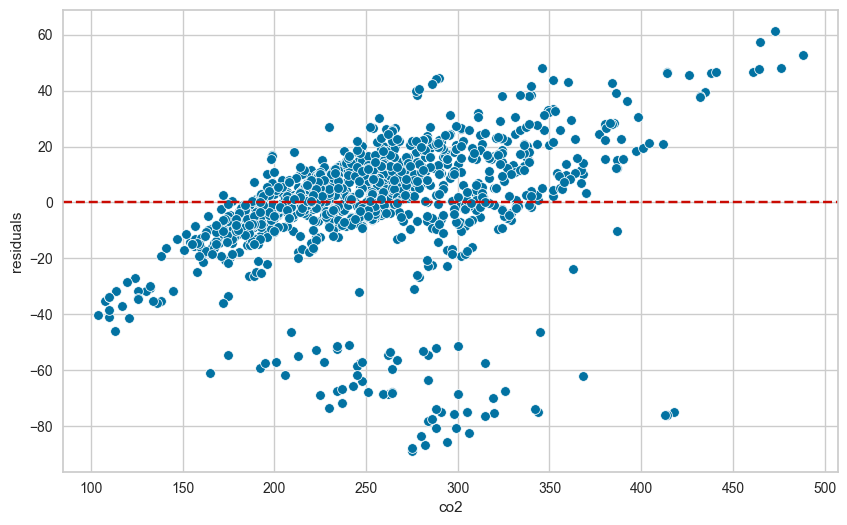

In [101]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x= y_test, y=residuals)
plt.axhline(y=0, color = "r", linestyle ="--" )
plt.ylabel("residuals")
plt.show()

- In **simple linear regression**, if there is a significant correlation between the feature and the target, the data can be considered suitable for linear regression.
- However, in **multiple linear regression**, evaluating the data solely based on significant correlations between all features and the target may be misleading. 
  - In such cases, certain assumptions need to be checked.
1. The residuals should be:
   - Approximately equally and randomly distributed on both sides of the axis where the error is 0.
   - Free from any noticeable patterns.
2. The residual distribution should conform to a **normal distribution**.
- If these conditions are met, the data can be considered suitable for linear regression.

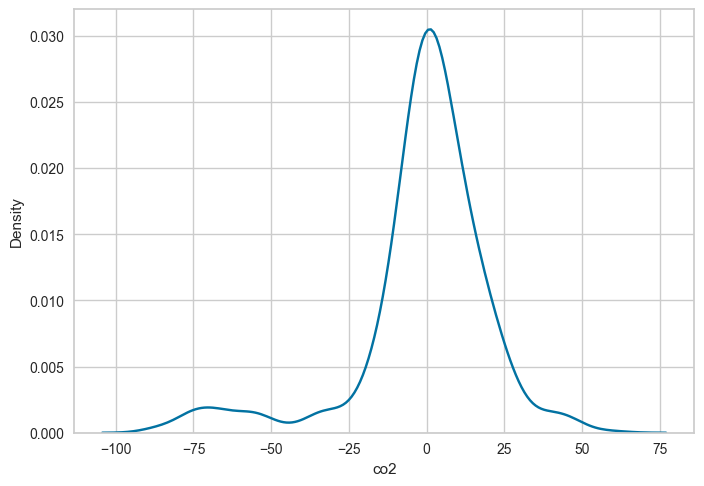

In [102]:
sns.kdeplot(residuals);

# The residuals can be checked for compliance with a normal distribution using a kdeplot.

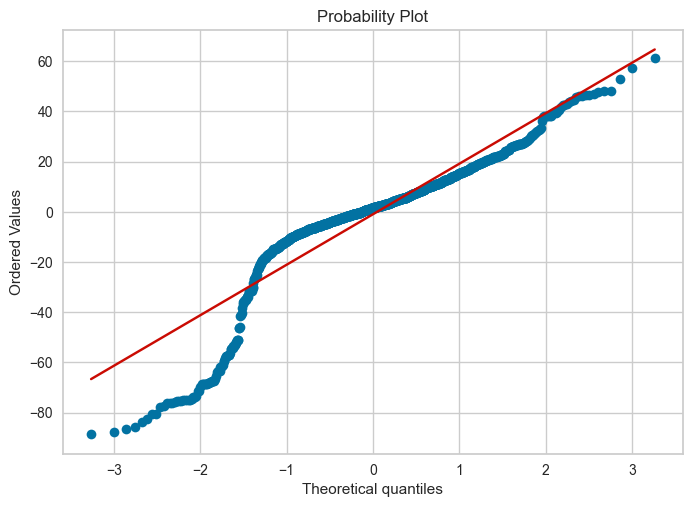

In [103]:
stats.probplot(residuals, dist = "norm", plot = plt);

# A probability plot is used to check whether the residuals comply with a normal distribution.
# By setting the `dist` parameter to "norm", it specifies that the expected theoretical distribution is normal.
# If the data follows a normal distribution, the points on the plot will align approximately along a straight line.
# However, if the data does not follow a normal distribution, the points will scatter outside the line, indicating that the model's residuals do not conform to a normal distribution.

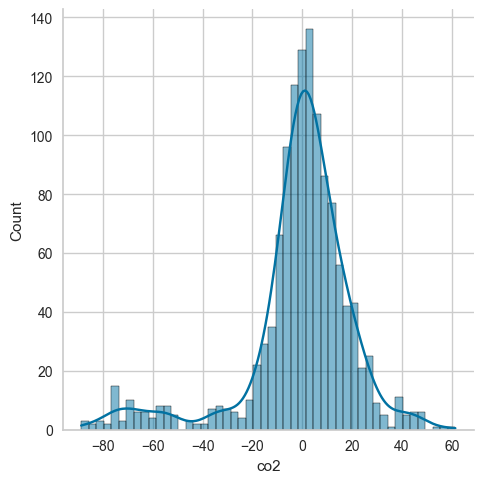

In [104]:
sns.displot((y_test-y_pred), bins=50, kde=True);

### <font color='blue'> <b>Prediction Error for LinearRegression</b><font color='black'>

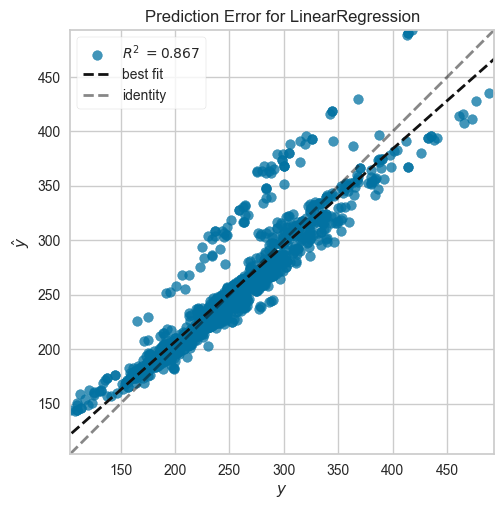

In [105]:
# Examining how the errors are distributed.

model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)  
visualizer.show();   


# <font color='green'> <b>Final Model and Prediction</b><font color='black'>

In [106]:
final_model = LinearRegression()
final_model.fit(X, y)  # Training final model using the entire dataset.

LinearRegression()

In [107]:
# Testing the model with a sample data input.
CO2_sample = [[5.0, 15.8, 9.8, 13.1], [3.0, 11.9, 8.5, 10.4]]
CO2_sample

[[5.0, 15.8, 9.8, 13.1], [3.0, 11.9, 8.5, 10.4]]

In [108]:
final_model.predict(CO2_sample)

array([305.01254334, 240.74203292])

In [109]:
y_pred_final = final_model.predict(X)
y_pred_final

array([202.56836677, 222.70216374, 159.50501706, ..., 225.97629479,
       220.55869436, 231.22676751])

In [110]:
my_dict = {"Actual": y, "pred": y_pred_final, "residual": y - y_pred_final}
compare = pd.DataFrame(my_dict)
compare.head(20)

,Actual,pred,residual
0,196,202.568367,-6.568367
1,221,222.702164,-1.702164
2,136,159.505017,-23.505017
3,255,256.706575,-1.706575
4,244,249.993177,-5.993177
5,230,243.156022,-13.156022
6,232,244.066567,-12.066567
7,255,259.604803,-4.604803
8,267,266.401765,0.598235
9,212,217.050155,-5.050155


In [111]:
def eval_metric(Actual, pred):
    mae = mean_absolute_error(Actual, pred)
    mse = mean_squared_error(Actual, pred)
    rmse = np.sqrt(mean_squared_error(Actual, pred))
    R2_score = r2_score(Actual, pred)
    # print("Model testing performance: ")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [112]:
print("Model testing performance: ")
eval_metric(compare.Actual, compare.pred)

Model testing performance: 
--------------------------
R2_score 	: 0.8731018458994231
MAE 		: 13.804358297494685
MSE 		: 446.02100718681487
RMSE 		: 21.119209435649214


In [113]:
rmse = np.sqrt(mean_squared_error(y, y_pred_final))
rmse

np.float64(21.119209435649214)

In [114]:
rmse / avg_em

np.float64(0.08408742808677064)

In [115]:
engine_size = 2.0
fuel_cons_city = 8.2
fuel_cons_hwy = 6.5
fuel_cons_comb = 7.7

In [120]:
# This predicts the CO2 emissions of a vehicle based on its engine size and fuel consumption characteristics.

X = np.array([[engine_size, fuel_cons_city, fuel_cons_hwy, fuel_cons_comb]])
# Predict the CO2 emissions using the final model
CO2 = final_model.predict(X)

CO2 = np.squeeze(CO2).round(1)
# Calculate the error ratio by dividing RMSE by the average emissions
rate = rmse / avg_em  
accuracy_rate = ((1 - rate) * 100).round(1)  # accuracy percentage based on the error ratio

print("The CO2 emissions of this vehicle will be approximately", accuracy_rate, "accuracy", CO2,  "g/Km.")

The CO2 emissions of this vehicle will be approximately 91.6 accuracy 189.8 g/Km.


In [ ]:
import pickle

# Save the final model to a file using the pickle module.
pickle.dump(final_model, open("final_mlr_model", "wb"))

# This allows the saved model to be loaded later for predictions or analysis without retraining.

In [ ]:
new_model = pickle.load(open("final_mlr_model", "rb"))

# The loaded model (new_model) can now be used for predictions or further analysis.